#LOGISTIC REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("/content/diabetes2.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
# Assuming 'Outcome' is the target variable and the rest are features
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Evaluate the model (optional, but good practice)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix:
 [[78 21]
 [19 36]]


In [12]:
#2. Apply L1 regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear') # liblinear is a common solver for l1 penalty
model_l1.fit(X_train, y_train)

# Make predictions with the L1 model
y_pred_l1 = model_l1.predict(X_test)

# Print the accuracy of the L1 model
print("\nModel Accuracy with L1 Regularization:", accuracy_score(y_test, y_pred_l1))


Model Accuracy with L1 Regularization: 0.7532467532467533


In [13]:
#3.  Apply L2 regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear') # liblinear is a common solver for l2 penalty
model_l2.fit(X_train, y_train)

# Make predictions with the L2 model
y_pred_l2 = model_l2.predict(X_test)

# Print the accuracy of the L2 model
print("\nModel Accuracy with L2 Regularization:", accuracy_score(y_test, y_pred_l2))

# Print the coefficients of the L2 model
print("\nModel Coefficients with L2 Regularization:", model_l2.coef_)


Model Accuracy with L2 Regularization: 0.7597402597402597

Model Coefficients with L2 Regularization: [[ 0.06816975  0.02566303 -0.01833972  0.00178272 -0.00098341  0.06389169
   0.4518495   0.02405413]]


In [14]:
#4.  Elastic Net regularization
# Elastic Net penalty requires a solver that supports it, like 'saga' or 'newton-cg' with l1_ratio
# We also need to specify l1_ratio, which controls the mix of L1 and L2 penalties.
# l1_ratio = 1 corresponds to L1 penalty, l1_ratio = 0 corresponds to L2 penalty.
# A value between 0 and 1 specifies a mix.

# Initialize and train the Logistic Regression model with Elastic Net
# Choosing 'saga' solver which supports elasticnet
model_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000) # You might need to increase max_iter
model_elasticnet.fit(X_train, y_train)

# Make predictions with the Elastic Net model
y_pred_elasticnet = model_elasticnet.predict(X_test)

# Print the accuracy of the Elastic Net model
print("\nModel Accuracy with Elastic Net Regularization:", accuracy_score(y_test, y_pred_elasticnet))

# Print the coefficients of the Elastic Net model
print("\nModel Coefficients with Elastic Net Regularization:", model_elasticnet.coef_)


Model Accuracy with Elastic Net Regularization: 0.7337662337662337

Model Coefficients with Elastic Net Regularization: [[ 0.08578165  0.01176837 -0.03207067 -0.00108095  0.00048965  0.00101173
   0.00611386 -0.00025094]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
#5.
# Initialize and train the Logistic Regression model with multi_class='ovr'
model_ovr = LogisticRegression(multi_class='ovr')
model_ovr.fit(X_train, y_train)

# Make predictions
y_pred_ovr = model_ovr.predict(X_test)

# Evaluate the model
print("\nAccuracy with multi_class='ovr':", accuracy_score(y_test, y_pred_ovr))
print("Classification Report with multi_class='ovr':\n", classification_report(y_test, y_pred_ovr))
print("Confusion Matrix with multi_class='ovr':\n", confusion_matrix(y_test, y_pred_ovr))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy with multi_class='ovr': 0.7402597402597403
Classification Report with multi_class='ovr':
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix with multi_class='ovr':
 [[78 21]
 [19 36]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
#6.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
# We need to use a solver that supports both 'l1' and 'l2', like 'liblinear' or 'saga'
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest accuracy score found by GridSearchCV:")
print(grid_search.best_score_)

# You can also get the best estimator and evaluate it on the test set
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)
print("\nAccuracy of the best model on the test set:", accuracy_score(y_test, y_pred_grid))


Best parameters found by GridSearchCV:
{'C': 1, 'penalty': 'l1'}

Best accuracy score found by GridSearchCV:
0.7655204584832733

Accuracy of the best model on the test set: 0.7532467532467533


In [17]:
#7.

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize StratifiedKFold
# n_splits is the number of folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
# Use a solver that is suitable for the data
model_skf = LogisticRegression(solver='liblinear', random_state=42)

# Perform cross-validation
# cross_val_score returns an array of scores, one for each fold
cv_scores = cross_val_score(model_skf, X, y, cv=skf, scoring='accuracy')

# Print the scores for each fold
print("Accuracy scores for each fold:", cv_scores)

# Print the average accuracy
print("Average accuracy using Stratified K-Fold:", cv_scores.mean())

Accuracy scores for each fold: [0.75974026 0.78571429 0.78571429 0.73856209 0.75816993]
Average accuracy using Stratified K-Fold: 0.7655801714625243


In [18]:
#9.
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
# Include 'solver' in the parameters
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # Include solvers that support l1 and l2
}

# Initialize RandomizedSearchCV
# n_iter is the number of parameter settings that are sampled
# cv is the cross-validation strategy
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000), # Increase max_iter for some solvers like saga
    param_distributions=param_dist,
    n_iter=10, # Number of iterations (adjust as needed)
    cv=5,
    scoring='accuracy',
    random_state=42, # for reproducibility
    n_jobs=-1 # Use all available cores
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

print("\nBest accuracy score found by RandomizedSearchCV:")
print(random_search.best_score_)

# You can also get the best estimator and evaluate it on the test set
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
print("\nAccuracy of the best model on the test set (from RandomizedSearchCV):", accuracy_score(y_test, y_pred_random))

Best parameters found by RandomizedSearchCV:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

Best accuracy score found by RandomizedSearchCV:
0.7655204584832733

Accuracy of the best model on the test set (from RandomizedSearchCV): 0.7597402597402597


In [19]:
#10.
from sklearn.multiclass import OneVsOneClassifier

# Initialize the base Logistic Regression model
base_model = LogisticRegression(solver='liblinear', random_state=42) # Using a suitable solver

# Initialize the OneVsOneClassifier with the base model
ovo_model = OneVsOneClassifier(base_model)

# Train the OvO model
# Note: OneVsOneClassifier is not directly compatible with the multi_class parameter of LogisticRegression.
# You fit the OneVsOneClassifier wrapper with the base model.
ovo_model.fit(X_train, y_train)

# Make predictions with the OvO model
y_pred_ovo = ovo_model.predict(X_test)

# Evaluate the OvO model
print("\nAccuracy with One-vs-One (OvO) Multiclass Logistic Regression:", accuracy_score(y_test, y_pred_ovo))
print("Classification Report with One-vs-One (OvO) Multiclass Logistic Regression:\n", classification_report(y_test, y_pred_ovo))
print("Confusion Matrix with One-vs-One (OvO) Multiclass Logistic Regression:\n", confusion_matrix(y_test, y_pred_ovo))



Accuracy with One-vs-One (OvO) Multiclass Logistic Regression: 0.7597402597402597
Classification Report with One-vs-One (OvO) Multiclass Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix with One-vs-One (OvO) Multiclass Logistic Regression:
 [[83 16]
 [21 34]]


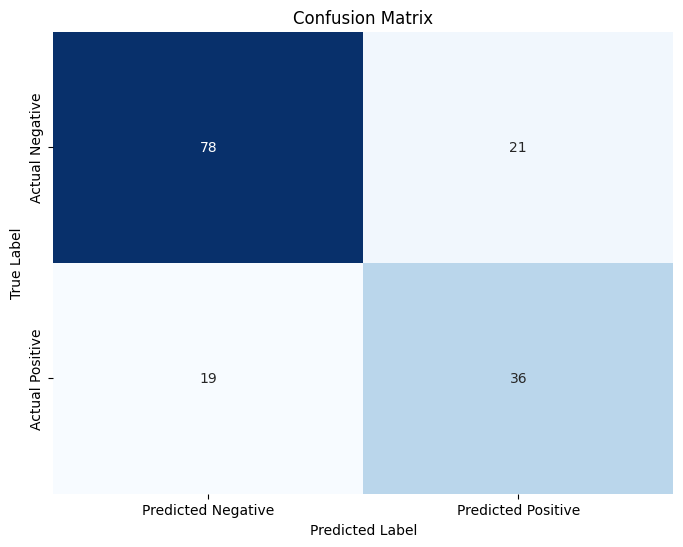

In [20]:
#11.
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
#12.
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate and print Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Model Performance Metrics:
Precision: 0.631578947368421
Recall: 0.6545454545454545
F1-Score: 0.6428571428571429


In [22]:
#13.
# Calculate class distribution
class_counts = y.value_counts()
print("Class distribution:")
print(class_counts)

# Determine if the dataset is imbalanced
is_imbalanced = class_counts.min() / class_counts.max() < 0.5  # A common heuristic
print(f"\nIs the dataset imbalanced? {is_imbalanced}")

# Initialize and train the Logistic Regression model with class weights
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
model_weighted = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model_weighted.fit(X_train, y_train)

# Make predictions with the weighted model
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate the weighted model
print("\nModel Evaluation with Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))

# You can compare the performance metrics (Precision, Recall, F1-Score)
# with the original model to see the impact of class weights,
# especially on the minority class.
print("\nPerformance Metrics with Class Weights:")
print("Precision:", precision_score(y_test, y_pred_weighted))
print("Recall:", recall_score(y_test, y_pred_weighted))
print("F1-Score:", f1_score(y_test, y_pred_weighted))

Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Is the dataset imbalanced? False

Model Evaluation with Class Weights:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.70      0.76        99
           1       0.58      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154

Confusion Matrix:
 [[69 30]
 [14 41]]

Performance Metrics with Class Weights:
Precision: 0.5774647887323944
Recall: 0.7454545454545455
F1-Score: 0.6507936507936508
